In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv(r"D:\New Folder\E-Commerce\E-commerce Dataset.csv")
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [48]:
newdf = df.drop(["Order_Date", "Time", "Customer_Id", "Device_Type", "Customer_Login_type"], axis = 1)

In [49]:
newdf.head()

,Aging,Gender,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,8.0,Female,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2.0,Female,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,8.0,Female,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,7.0,Female,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,9.0,Female,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [50]:
newdf.duplicated().sum()

13951

In [51]:
newdf.drop_duplicates(inplace = True)

In [52]:
newdf.duplicated().sum()

0

In [53]:
newdf.isnull().sum()

Aging               1
Gender              0
Product_Category    0
Product             0
Sales               1
Quantity            2
Discount            1
Profit              0
Shipping_Cost       1
Order_Priority      2
Payment_method      0
dtype: int64

In [54]:
newdf.shape

(37339, 11)

In [55]:
newdf = newdf.dropna()   

In [56]:
newdf.shape

(37331, 11)

In [57]:
encoder = LabelEncoder()
columns = ["Aging","Gender","Product_Category","Product","Sales","Discount","Quantity","Discount","Profit","Shipping_Cost","Order_Priority","Payment_method"]

for cols in columns:
    newdf[cols] = encoder.fit_transform(newdf[cols])

In [58]:
newdf.head()

,Aging,Gender,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,7,0,0,7,22,0,2,172,43,3,0
1,1,0,0,10,28,0,2,287,105,3,0
2,7,0,0,5,15,4,0,119,28,0,0
3,6,0,0,4,16,0,2,93,23,1,0
4,8,0,0,39,38,0,2,384,147,0,0


In [59]:
X = newdf.drop("Profit", axis = 1)
y = newdf["Profit"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)



# svm



In [61]:
from sklearn.svm import SVR


In [62]:
svr_model = SVR().fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)

In [64]:
accuracy_score_svr = 100-mse

accuracy_score_svr

82.01212141126548


# KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knr_model = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
y_pred = knr_model.predict(X_test)

In [67]:
mse1 = mean_squared_error(y_test, y_pred)

In [68]:
accuracy_score_knn = 100-mse1
accuracy_score_knn

97.88693928571429

 # RANDOMFOREST

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rfr_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)


In [71]:
mse2 = mean_squared_error(y_test, y_pred)

In [72]:
accuracy_score_rf = 100-mse2
accuracy_score_rf

99.99100940021502

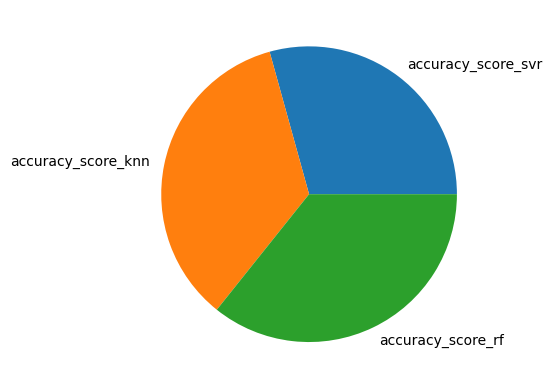

In [75]:
accuracy = ["accuracy_score_svr","accuracy_score_knn","accuracy_score_rf"]
accuracy_score = [82.01214214, 97.8869393, 99.99126249714286]
plt.pie(accuracy_score, labels=accuracy, )
plt.show()